# Computation of $pp \rightarrow Z\rightarrow e^+ e^-$ cross section

Here we are going to compute the production cross section for $pp \rightarrow Z \rightarrow e^+ e^-$ using parton distribution functions from MSTW. This is a simple code that we have modified to use `swig`, but is no longer very actively maintained. 

This makes use of objects that are adapted from [ROOT](root.cern.ch), particularly their [Lorentz Vector class](https://root.cern.ch/doc/master/classTLorentzVector.html). 

This code computes the differential production cross section of pp -> Z -> e+e- using the [MSTW 2008 PDF set](https://mstwpdf.hepforge.org/code/code.html).
It also computes the total production cross section. This can be compared to the data collected by
the CMS experiment at 7 TeV [here](https://hepdata.net/record/ins921788). 

## Instructions to download MSTW PDF grids

- Download the [PDFs](https://mstwpdf.hepforge.org/code/mstw2008grids.tar.gz)
- Unpack:
```
tar -zxvf mstw2008grids.tar.gz
```


## Compile code

In [1]:
! swig -c++ -python swig/qft.i
! python swig/setup_qft.py build_ext --inplace

running build_ext
building '_qft' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/qft_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/qft_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c LorentzVector.cpp -o build/temp.linux-x86_64-3.7/LorentzVector.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [3]:
import qft
import numpy as np
import matplotlib.pyplot as plt

## Create incoming $e^+ e^-$.

In [4]:
# create incoming e+ and e-
em_i   = qft.Particle( qft.LorentzVector(0,0, 91.2*0.5,91.2*0.5),  11);
ep_i   = qft.Particle( qft.LorentzVector(0,0,-91.2*0.5,91.2*0.5), -11);

## Compute differential cross section of $e^+ e^- \rightarrow Z \rightarrow e^+ e^-$

Sigma =  8.057648990164675e-07


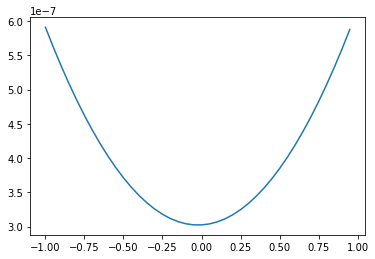

In [5]:
sigma = 0.
dcosTheta = 0.05
dsigma_domega = []
cosThetas = np.arange(-1,1,dcosTheta)
for cosTheta in cosThetas:
    # Produce e+e- --> Z --> e+e-
    ds_dO = qft.dSigmaDOmega( em_i, ep_i, 11, cosTheta )
    #print( "%6.2f %10.6e" % (cosTheta, ds_dO))
    # Integral = sum( dsigma/domega) * dcos(theta)
    sigma += ds_dO * dcosTheta;
    dsigma_domega.append(ds_dO)
print("Sigma = ", sigma)

plt.plot(cosThetas, dsigma_domega)
plt.show()

## Next set up the PDFs

In [6]:
# Get the PDF file
grid_file_name = "Grids/mstw2008lo.00.dat"
pdf = qft.c_mstwpdf(grid_file_name)

In [7]:
q = 100.
print("q = " , str(q) , ", ",  "alphaS(Q0) = " ,  str(pdf.alphaSQ0) , ", ", "alphaS(MZ) = " , str(pdf.alphaSMZ) , ", ",  "alphaSorder = " , str(pdf.alphaSorder) , ", ",  "alphaSnfmax = " , str(pdf.alphaSnfmax))

q =  100.0 ,  alphaS(Q0) =  0.68183 ,  alphaS(MZ) =  0.13939 ,  alphaSorder =  0 ,  alphaSnfmax =  5


## Your code goes here. 

Here is an example to access PDFs using the software. You will adjust the code below to adjust the above $e^+e^-$ initial state to use a proton-proton $pp$ initial state. 

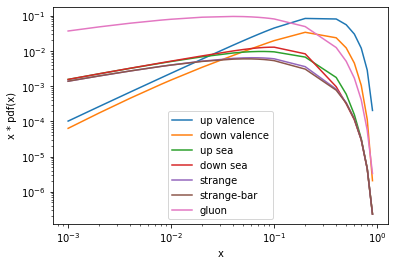

In [18]:
xvals = np.array([0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
pdfvals = []
labels = ['up valence', 'down valence', 'up sea', 'down sea', 'strange', 'strange-bar', 'gluon']
for x in xvals: 
    pdf.update(x,q)
    upv = x * pdf.cont.upv;
    dnv = x * pdf.cont.dnv;
    usea = x * pdf.cont.usea;
    dsea = x * pdf.cont.dsea;
    s = x * pdf.cont.str;
    sbar = x * pdf.cont.sbar;
    chm = x * pdf.cont.chm;
    cbar = x * pdf.cont.cbar;
    bot = x * pdf.cont.bot;
    bbar = x * pdf.cont.bbar;
    glu = x * pdf.cont.glu;
    phot = x * pdf.cont.phot;
    pdfvals.append([upv, dnv, usea, dsea, s, sbar, glu])
    #buf = "%8.4e %10.6e %10.6e %10.6e %10.6e %10.6e %10.6e %10.6e" % ( x, upv, dnv, usea, dsea, s, sbar, glu )
    #print(buf)
    
plotvals = np.array(pdfvals)
plt.plot(xvals,plotvals)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("x")
plt.ylabel("x * pdf(x)")
plt.legend(labels)
plt.show()